In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
table.dataframe{font-size:18px;}
</style>
"""))

**<font size="6", color="red">ch2. 한글형태소분석</font>**
# 1. 자연어처리
- 자연어: 일상적인 언어
- 자연어 처리분야:
    * 자연어 이해:
    * 자연어 생성:
    * 활용분야: 트랜드분석, 탐색적 분석, 맞춤법검사, 번역기, 챗봇
# 2. 자연어 이해 처리절차
- 전처리: 단어, 어절 추출
- 분석 후보 생성: 형태소 분리, 품사태깅(pos tagging)
- 제약조건(불용어 처리) : 규칙 확인 
- 분석: 시각화(워드클라우드). 연관분석, RNN, LSTM, GRU
# 3. 한글형태소 분석 엔진(Konply,...)
- 공통기능: morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사 태그)
- konply(pip install konlpy)
    * HanNanum: 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, path설정)
    * Kkma : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, path설정) 
    * Komoran: 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, path설정) 
    * Okt
- Mecab(pip install python-mecab-ko)
    * Mecab: C++로 만든 형태소 분석기, 저사양환경에서 사용가능 다국어 바인딩 지원 

In [4]:
import os
os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [6]:
text = '''아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다. 
'''

## 3.1 HanNanum

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None,
                   max_heap_size=1024) #기본값:1024
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

In [7]:
# 형태소 분석:morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [24]:
#명사 추출
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [25]:
#품사 추출
print(hannanum.pos(text))

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]


In [7]:
text = ''' 안녕하세요~ 이첸입니다 !
드디어 찾아온 귀하고 소중한 소통의 기회ㅠㅠ
뭐부터 얘기할까 많이 고민하다 그냥..
너무 너무 보고싶고!  많이 많이 사랑해요 ❤
앞으로도 여러분에게 기대 이상의 무대를 보여줄 수 있게 많이 많이 응원해주시고 많이 많이 투표해주세요 !!
'''

In [26]:
# 퀴즈 1. text에서 형용사(PA)만 추출
tagged_text = hannanum.pos(text,ntags=22)
words = [token for token, tag in tagged_text if tag=='PA']

# for token, tag in tagged_text:
    #if tag=='PA':
        #word.append(token)
words

['아름답', '많']

In [27]:
# 퀴즈2 : text에서 명사(NC, NQ, NB, NN, NP)만 추출
print([token for token, tag in tagged_text if tag.find('N')!=-1 ])
print([token for token, tag in tagged_text if (tag=='NC') |
                                              (tag=='NQ') |
                                              (tag=='NB') |
                                              (tag=='NN') |
                                              (tag=='NP')])
print([(token, tag) for token, tag in tagged_text \
               if tag in ('NC', 'NQ', 'NB', 'NN', 'NP') ] )
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13', '번', '사용', '언어']
['복잡', '한국어', '전세계', '13', '번', '사용', '언어']
[('복잡', 'NC'), ('한국어', 'NC'), ('전세계', 'NC'), ('13', 'NN'), ('번', 'NB'), ('사용', 'NC'), ('언어', 'NC')]
['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [14]:
# 퀴즈 3. text에서 보통명사만 추출
[token for token, tag in tagged_text if tag=='NC']

['안녕',
 '이첸입니',
 '귀',
 '소중',
 '소통',
 '기회ㅠㅠ',
 '얘기',
 '고민',
 '사랑',
 '❤',
 '앞',
 '기대',
 '이상',
 '무대',
 '응원',
 '투표']

# 3.3 Kkma

In [28]:
from konlpy.tag import Kkma
kkma= Kkma(jvmpath=None,
          max_heap_size=1024) #"4m","4g"
#형태소 분석
print(kkma.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [39]:
# 품사 태깅
print(kkma.pos(text)) # ntags 지정 불가(무조건 56으로)

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [40]:
# 명사 추출
tagged_text = kkma.pos(text)
print([word for word, tag in tagged_text if tag in ('NNG','NNP','NNB','NNM') ])
print(kkma.nouns(text))

['복잡', '한국어', '전세계', '번째', '사용', '언어']
['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [41]:
# 보통명사(NNG)+고유명사(NNP)
print([word for word, tag in tagged_text if tag in ('NNG','NNP') ])

['복잡', '한국어', '전세계', '사용', '언어']


# 3.4 Komoran

In [3]:
from konlpy.tag import Komoran
komoran = Komoran() # max_heap_size=1024
# 형태소 분석
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [4]:
# 명사 추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [6]:
# 품사 태깅
print(komoran.pos(text)) # ntags 조정 불가

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [7]:

# 일반명사(NNG), 고유명사(NNP)만 추출
[token for token, tag in komoran.pos(text) if tag in ('NNG','NNP')]

['한국어', '전', '세계', '사용', '언어']

# 3.4 Twitter(Okt: Open Korean Text)

In [10]:
%%time
from konlpy.tag import Twitter, Okt
# okt = Twitter()
okt = Okt() # max_heap_size
print('구 추출 :', okt.phrases(text))
print('형태소 추출 :', okt.morphs(text))
print('명사 추출 :', okt.nouns(text))
tagged_text = okt.pos(text)
print('품사 태깅을 이용한 명사 추출 :',
     [token for token, tag in tagged_text if tag=='Noun']
     )
print('품사 태깅 :', tagged_text)

구 추출 : ['다소', '한국어', '전세계', '13번째', '사용', '사용되는 언어', '13', '번째', '언어']
형태소 추출 : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다', '.']
명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
CPU times: total: 14.4 s
Wall time: 3.5 s


## 3.5 Mecab
    - pip install python-mecab-ko

In [11]:
%%time
from mecab import MeCab
mecab = MeCab() # 힙메모리 사이즈 지정이 안 됨
print('형태소 추출 :', mecab.morphs(text))
print('명사 추출 :', mecab.nouns(text))
tagged_text = mecab.pos(text) # ntags 조정 불가 (ntags=43 고정)
print('품사 태깅을 이용한 명사 추출 :',
    [token for token, tag in tagged_text \
     if tag in ('NNG','NNP','NNB','NNBC','NR','NP')]
     )
print('품사태깅 :', tagged_text)

형태소 추출 : ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다', '.']
명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사태깅 : [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF')]
CPU times: total: 141 ms
Wall time: 72.3 ms


In [12]:
# 한글말뭉치
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
print('글자수:',len(data))

글자수: 18884


# 4 말뭉치

In [13]:
# 영어 말뭉치
import nltk
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [13]:
%pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [14]:
# 한글 말뭉치
from konlpy.corpus import kolaw
#data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수 :', len(data))
print('%r' % data[:100])

글자수 : 18884
'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'


# 5.워드클라우드

In [15]:
# 말뭉치에서 단어추출(특수 문자 제외)
from nltk.tokenize import RegexpTokenizer
from nltk.tag      import pos_tag
ret = RegexpTokenizer('[\w]{2,}')
words = ret.tokenize(emma)
# 명사(고유명사제외)만 추출
emma_tags = pos_tag(words)
noun_list = [token for token, tag in emma_tags if tag in ('NN', 'NNS')]
print('추출된 명사 갯수 :',len(noun_list), '\t단어 종류수 :',len(set(noun_list)))
print('noun_list :', noun_list[:10])
emma_noun = ' '.join(noun_list)
print('워드 클라우드에 필요한 내용 :', emma_noun[:100])

추출된 명사 갯수 : 22362 	단어 종류수 : 3498
noun_list : ['Emma', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'daughters', 'indulgent']
워드 클라우드에 필요한 내용 : Emma clever home disposition blessings existence years world daughters indulgent father consequence 


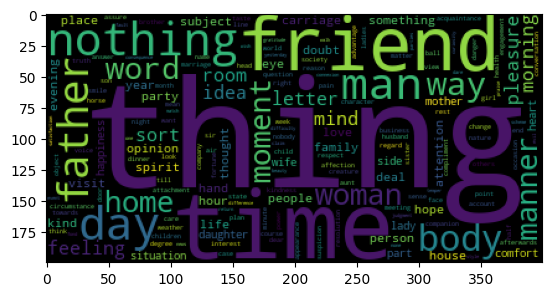

In [17]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

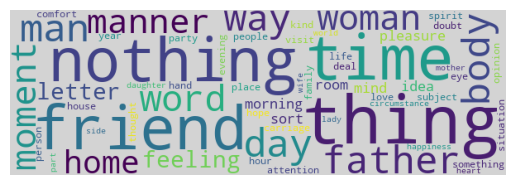

In [18]:
wordcloud = WordCloud(# font_path='',
                    width=600, # 생성될 이미지 가로(픽셀)
                    background_color='lightgray', # 배경색
                    max_words=300, # 표시될 단어의 최대갯수
                    relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
                    colormap='viridis', #글씨컬러맵
                    max_font_size=80, #최대폰트사이즈
                    min_font_size=10 #최소사이즈
                    
)
wordcloud.generate(emma_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
# 한글 말뭉치 data로 워드클라우드 시각화
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab import MeCab
analyzer = Hannanum()
noun_list = analyzer.nouns(data)
noun_list2 = [word for word , tag in analyzer.pos(data) if tag in ('NC','NQ')]
print(noun_list[:20])
print(noun_list2[:20])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임시정부', '법통', '불의', '항거', '4·19민주이념', '계승', '조국', '민주개혁', '평화적', '통일', '사명']
[]


In [21]:
# 한글 말뭉치 data로 워드클라우드 시각화
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab      import MeCab
analyzer = MeCab()
noun_list = analyzer.nouns(data)
noun_list = [word for word, tag in analyzer.pos(data) \
              if tag in ('NNG', 'NNP')]
data_noun = ' '.join(noun_list)
data_noun[:100]


'대한민국 헌법 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입각 정의 인도 동포 애 민족 단결 사회 폐습 불의 타'

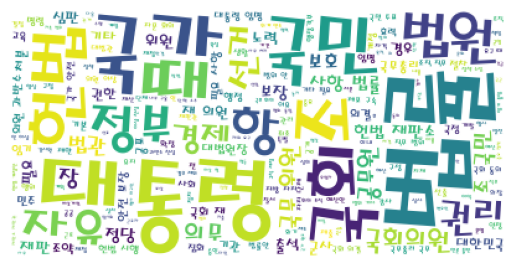

In [22]:
wordcloud = WordCloud(
                font_path='C:\\Windows\\Fonts\\HMKMMAG.TTF',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
# 불용어 처리(불용어지정 + 불용어사전)
from wordcloud import STOPWORDS
불용어 = STOPWORDS | {'대통령', '법률'} # | : 집합합연산자
불용어 = set(['대통령','법률'])
불용어 = {'대통령','법률','조'}
불용어

{'대통령', '법률', '조'}

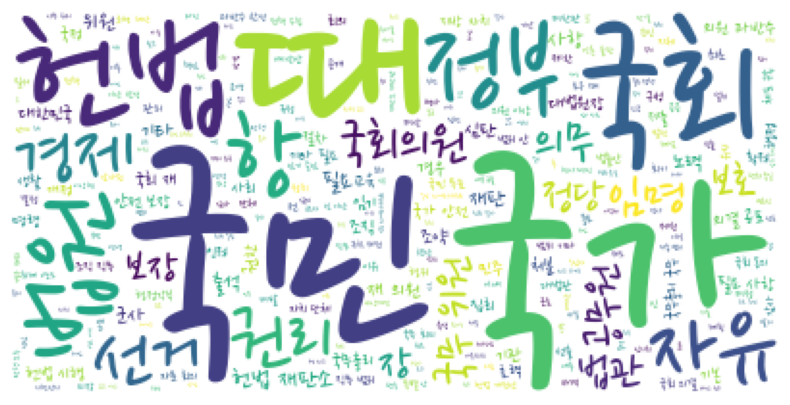

In [24]:
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

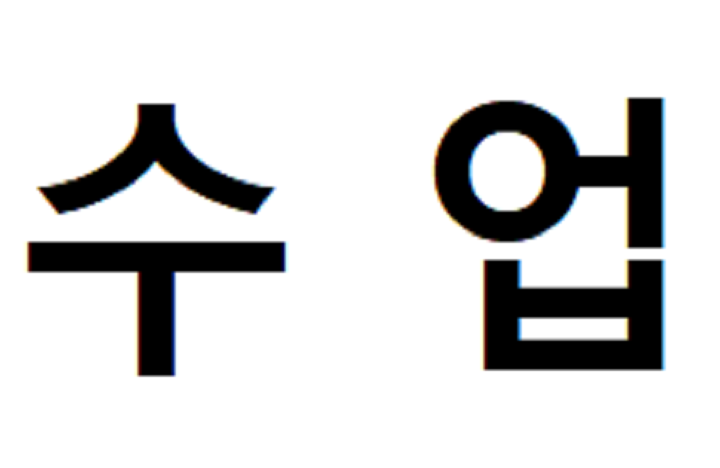

In [26]:
#마스킹 : 워드클라우드를 지정된 마스크 이미지에 맞게 설정
# 이미지를 넘파이 배열로 방법1
from PIL import Image
mask = Image.open('data/test.png')
mask

(468, 720, 3)

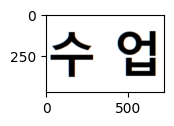

In [33]:
# 이미지를 넘파이 배열로 방법2
import cv2
# %pip install opencv-contrib-python
mask = cv2.imread('data/test.png'
                 # , cv2.IMREAD_GRAYSCALE
                 )
plt.figure(figsize=(2,1))
plt.imshow(mask)
mask.shape

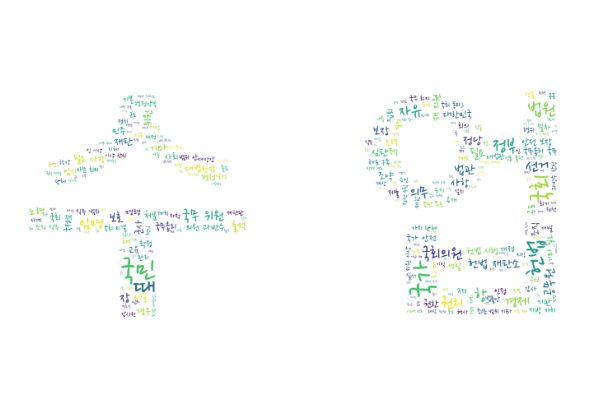

In [28]:
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

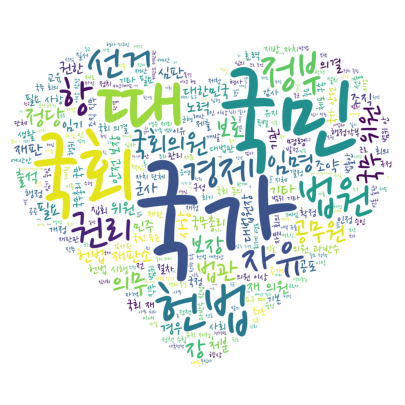

In [29]:
mask2 = cv2.imread('data/heart.jpg')
# plt.figure(figsize=(2,2))
# plt.imshow(mask2)
mask2.shape
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask2
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

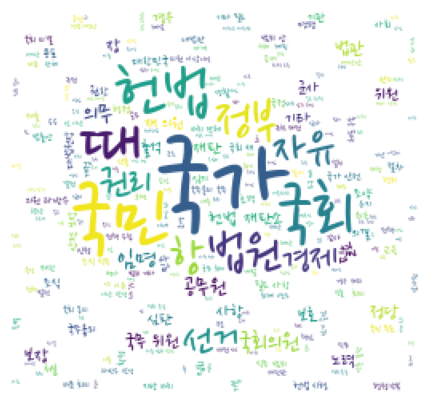

In [30]:
mask3 = cv2.imread('data/test2.jpg')
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask3
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

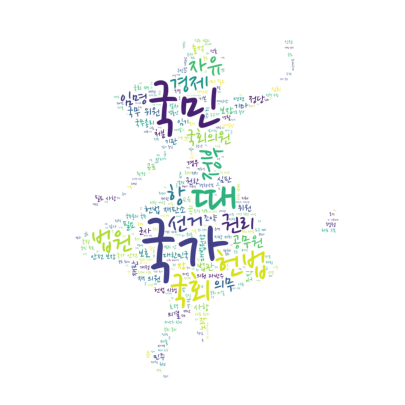

In [31]:
mask4 = cv2.imread('data/test3.png')
mask4.shape
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask4
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(900, 900)


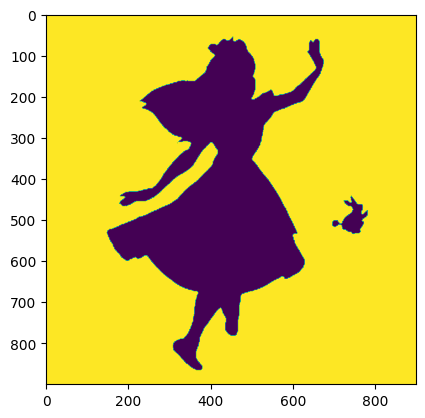

In [34]:
import numpy as np
img = Image.open('data/test3.png')
mask5 = np.array(img)
print(mask5.shape)
plt.imshow(mask5)

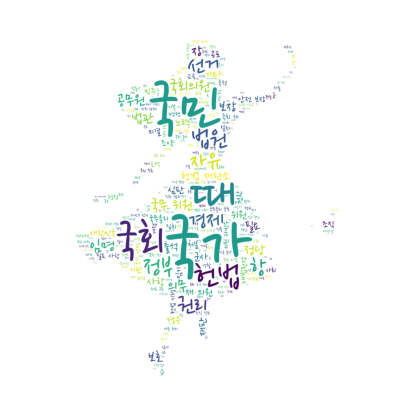

In [35]:
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask5
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(1124, 720, 3)


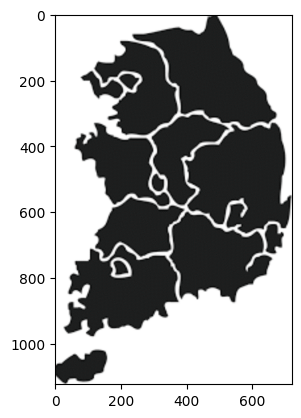

In [41]:
# convert('RGB') : 1채널이미지 ->3채널
# convert('RGBA') : 1채널이미지 -> 4채널(RGB+투명도채널)
img = Image.open('data/south_korea.png').convert('RGB')
mask5 = np.array(img)
print(mask5.shape)
plt.imshow(mask5)

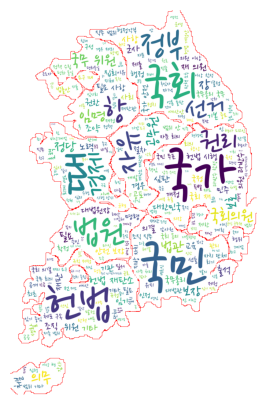

In [42]:
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask5,
                contour_color='red',
                contour_width=1
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
#생성된 wordcloud 저장
wordcloud.to_file('korea.jpg')

# 단어의 빈도수 시각화(nltk,Text)


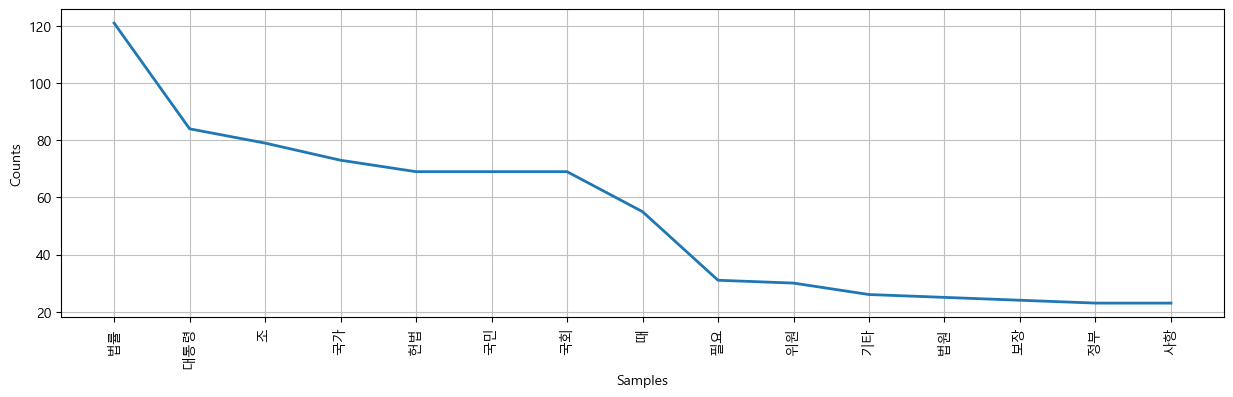

In [43]:
import nltk
data_text = nltk.Text(noun_list)
plt.figure(figsize=(15,4))
plt.rc('font', family='Malgun Gothic')
data_text.plot(15)
plt.show()

In [45]:
data_text.vocab().most_common(15)

[('법률', 121),
 ('대통령', 84),
 ('조', 79),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('국회', 69),
 ('때', 55),
 ('필요', 31),
 ('위원', 30),
 ('기타', 26),
 ('법원', 25),
 ('보장', 24),
 ('정부', 23),
 ('사항', 23)]

('법률', '대통령', '조', '국가', '헌법', '국민', '국회', '때', '필요', '위원', '기타', '법원', '보장', '정부', '사항')
(121, 84, 79, 73, 69, 69, 69, 55, 31, 30, 26, 25, 24, 23, 23)


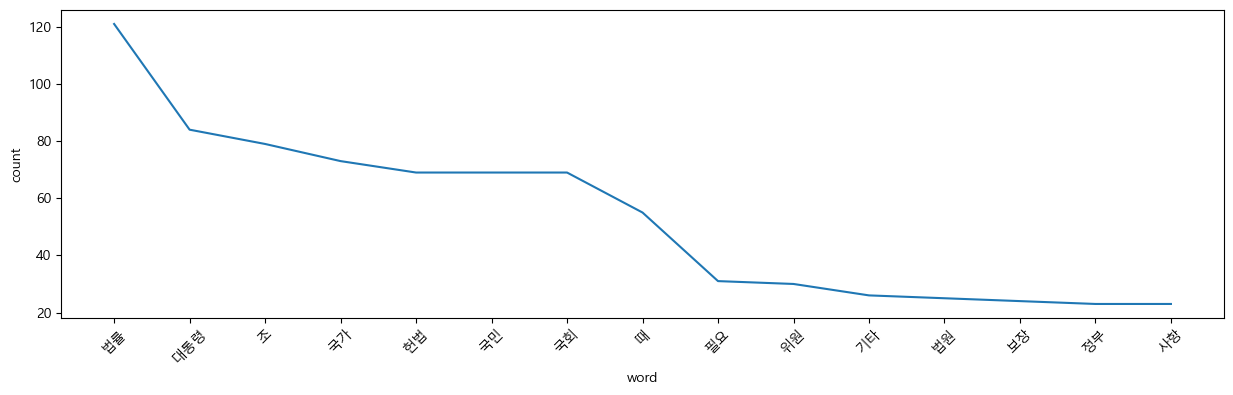

In [46]:
word, counts = zip(*data_text.vocab().most_common(15))
print(word)
print(counts)
plt.figure(figsize=(15,4))
plt.plot(word, counts)
plt.xticks(rotation=45)
plt.xlabel('word')
plt.ylabel('count')
plt.show()

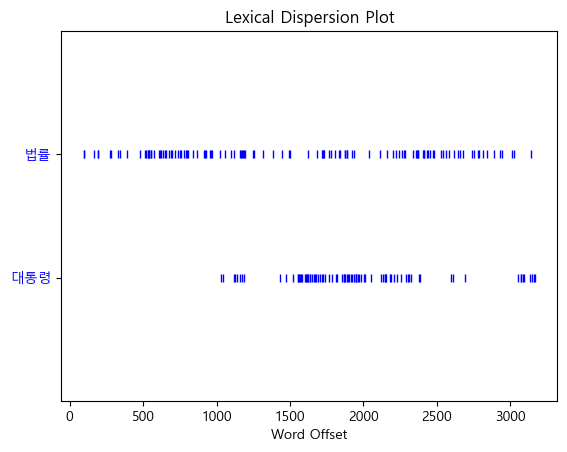

In [47]:
data_text.dispersion_plot(['법률','대통령'])

# 6. 워드 임베딩 
- 단어 간 벡터 계산 -> 단어간 유사성 도출

In [48]:
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, "xml")
link_el = soup.select('item link')
link_list = [el.text for el in link_el]
print(len(link_list))

20


In [49]:
'''각 link들의 뉴스 기사 -> 명사만 : 
  [['드촌', '재건축', '명사1', .....],
   ['캠핑장', '재건축', '명사2', ....], ...]  
'''
from konlpy.tag import Kkma
kkma = Kkma()
news = []
for link in link_list:
    response = requests.get(link)
    # print(response.status_code)
    news_soup = BeautifulSoup(response.content, "html.parser")
    title = news_soup.select_one('title').text
    description = str(news_soup.select_one('meta[name="description"]'))
    noun_list = kkma.nouns(title + ' ' + description)
    불용어 = {'뉴스','앵커'}
    noun_list = [word for word in noun_list if word not in 불용어]
    #print(noun_list)
    news.append(noun_list)
    

In [51]:
# 워드 임베딩 (단어간 거리 계산)
# pip install gensim
from gensim.models import Word2Vec
model = Word2Vec(news, # 학습데이터 2차원
                window=10, # 각 단어의 좌우10개 단어를 학습 컨텐츠로 사용
                min_count =2, #학습데이터에서 2회이상 등장한 단어만 학습
                workers = -1 #병렬처리 core 수 -1: 모든 가용 코어 사용
                )

In [58]:
model.wv.most_similar('결혼')

[('분기', 0.23983341455459595),
 ('원', 0.20174549520015717),
 ('정', 0.1945856511592865),
 ('값', 0.17656247317790985),
 ('8월', 0.15761783719062805),
 ('비중', 0.15733380615711212),
 ('예비', 0.15172936022281647),
 ('천', 0.1428576558828354),
 ('최대', 0.13838361203670502),
 ('귀', 0.13499559462070465)]

In [60]:
model.wv.most_similar('결혼', topn=3)

[('분기', 0.23983341455459595),
 ('원', 0.20174549520015717),
 ('정', 0.1945856511592865)]